# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [422]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [423]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [424]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [425]:
heroes_df = heroes_df.drop('Unnamed: 0', axis = 1)

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [426]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [427]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Captain Atom,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

1. Use .info() to find nulls
2. Use .valuecounts() to find other outliers
3. Eliminate columns with high percentage of outliers
4. Kept a list of error indices in case I needed to go back and fix something later
5. Numeric columns - change null values to median to keep distribution similar
6. Categorical columns - change null values to "Unkown" to keep data and identify nulls as their own group



In [428]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [429]:
heroes_df.name.value_counts()
heroes_df.Gender.value_counts() # -: 29
heroes_df['Eye color'].value_counts() # -: 172
heroes_df['Race'].value_counts() #-: 304
heroes_df['Hair color'].value_counts() # -: 172
heroes_df['Height'].value_counts() # -99.0: 217
heroes_df['Publisher'].value_counts()
heroes_df['Skin color'].value_counts() #-: 662
heroes_df['Alignment'].value_counts() #-: 7
heroes_df['Weight'].value_counts() # -99.0: 217

heroes_df.head()

#Numerical: Height, Weight       Categorical: Gender, Eye Color, Hair Color, Skin Color, Alignment

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [430]:
#Dropping Skin color

skin_percent_null = len(Skin_Color_indices) /  len(heroes_df['Skin color']) #90%
skin_percent_null
heroes_df = heroes_df.drop("Skin color", axis = 1)

In [431]:
#Dropping Race
race_percent_null = len(heroes_df[heroes_df['Race'] == "-"]) /  len(heroes_df['Race']) #41%
race_percent_null
heroes_df = heroes_df.drop("Race", axis = 1)

In [432]:
#Numerical outliers

Weight_indices = list(heroes_df[heroes_df.Weight == -99.0].index)
Height_indices = list(heroes_df[heroes_df.Height == -99.0].index)

#Dealing with numerical outliers

heroes_df['Weight'] = heroes_df['Weight'].map(lambda x: heroes_df['Weight'].median() if x == -99.0 or np.isnan(x) else x)
heroes_df['Height'] = heroes_df['Height'].map(lambda x: heroes_df['Height'].median() if x == -99.0 else x)

Weight_indices #[]
Height_indices #[]

[4,
 6,
 14,
 15,
 18,
 21,
 23,
 26,
 32,
 35,
 45,
 46,
 50,
 53,
 54,
 57,
 58,
 62,
 64,
 66,
 76,
 77,
 79,
 81,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 93,
 99,
 100,
 112,
 115,
 116,
 120,
 122,
 123,
 125,
 127,
 128,
 130,
 132,
 134,
 142,
 143,
 146,
 151,
 153,
 158,
 159,
 160,
 163,
 167,
 169,
 177,
 178,
 181,
 182,
 183,
 188,
 191,
 192,
 194,
 198,
 199,
 202,
 204,
 209,
 219,
 227,
 232,
 234,
 238,
 242,
 243,
 251,
 252,
 254,
 259,
 261,
 263,
 275,
 276,
 277,
 280,
 281,
 282,
 287,
 289,
 290,
 291,
 303,
 309,
 317,
 325,
 326,
 341,
 346,
 347,
 348,
 354,
 356,
 358,
 359,
 361,
 363,
 364,
 365,
 374,
 376,
 380,
 381,
 382,
 383,
 384,
 385,
 387,
 390,
 393,
 398,
 399,
 402,
 404,
 410,
 411,
 417,
 419,
 420,
 424,
 426,
 427,
 436,
 437,
 440,
 447,
 449,
 450,
 453,
 454,
 458,
 459,
 461,
 464,
 465,
 466,
 469,
 481,
 486,
 488,
 492,
 493,
 494,
 499,
 503,
 506,
 507,
 508,
 509,
 511,
 512,
 515,
 516,
 520,
 526,
 530,
 535,
 536,
 541,
 543,
 55

In [433]:
#Remaining Categorical outliers

#Nan
Publisher_null_indices = list(heroes_df[heroes_df.Publisher.isnull() == True].index)

#Dealing with Categorical Nan
heroes_df['Publisher'] = heroes_df['Publisher'].map(lambda x: "Missing" if type(x) != str else x)

# "-"
Gender_indices = list(heroes_df[heroes_df.Gender == '-'].index)
Eye_color_indices = list(heroes_df[heroes_df['Eye color'] == '-'].index)
Hair_color_indices = list(heroes_df[heroes_df['Hair color'] == '-'].index)
Alignment_indices = list(heroes_df[heroes_df['Alignment'] == '-'].index)

#Dealing with Remaining Categorical "-"
categorical_columns = ["Gender", "Eye color", "Hair color", "Alignment"]
for column in categorical_columns:
    heroes_df[column] = heroes_df[column].map(lambda x: "Missing" if x == "-" else x)

In [434]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 8 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     734 non-null object
Alignment     734 non-null object
Weight        734 non-null float64
dtypes: float64(2), object(6)
memory usage: 46.0+ KB


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [435]:
heroes_df.head()

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Black,175.0,Marvel Comics,bad,62.0


In [436]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [437]:
heroes_df.set_index('name', inplace = True)

In [438]:
powers_df.set_index('hero_names', inplace = True)

In [439]:
heroes_df.join(powers_df, how = "left")

,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Black,175.0,Marvel Comics,bad,62.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,No Hair,193.0,Marvel Comics,bad,122.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,Male,blue,Blond,175.0,NBC - Heroes,good,62.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Blond,185.0,DC Comics,good,88.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Agent 13,Female,blue,Blond,173.0,Marvel Comics,good,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agent Bob,Male,brown,Brown,178.0,Marvel Comics,good,81.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

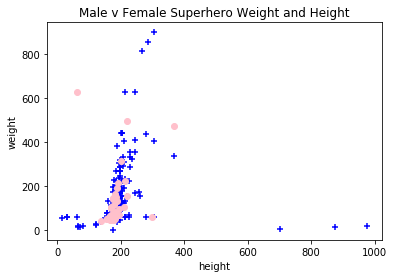

In [440]:
males = heroes_df[heroes_df.Gender == 'Male']
females = heroes_df[heroes_df.Gender == 'Female']

males.head()
females.head()

male_weights = list(males.Weight)
female_weights = list(females.Weight)

male_heights = list(males.Height)
female_heights = list(females.Height)

figure = plt.figure()
ax = figure.add_subplot(111)

ax.scatter(male_heights, male_weights, color = 'blue', marker = "+")
ax.scatter(female_heights, female_weights, color = 'pink')

ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_title('Male v Female Superhero Weight and Height')

plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [441]:
male_heroes_df = heroes_df[heroes_df.Gender == 'Male']
female_heroes_df = heroes_df[heroes_df.Gender == 'Female']

def show_distplot(dataframe, gender, column_name):
    
    x = list(dataframe[column_name])
    sns.distplot(x)
    plt.title("Distribution of {} of {} heroes".format(column_name.title(), gender.title()))
    return plt.show()
   

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


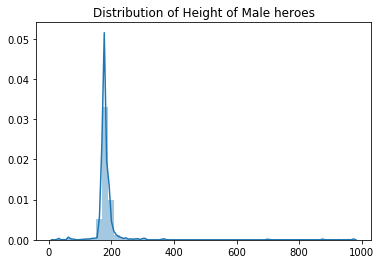

count    505.000000
mean     187.033663
std       58.438477
min       15.200000
25%      175.000000
50%      180.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

In [442]:
# Male Height
show_distplot(heroes_df, "male", "Height")
male_heroes_df['Height'].describe()

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


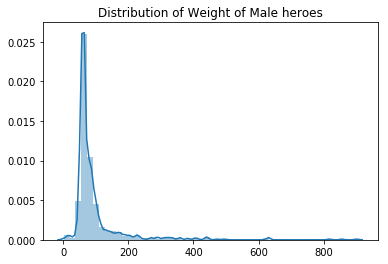

count    505.000000
mean     104.675248
std       95.550730
min        2.000000
25%       62.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64

In [443]:
# Male Weight
show_distplot(heroes_df, "male", "Weight")
male_heroes_df['Weight'].describe()

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


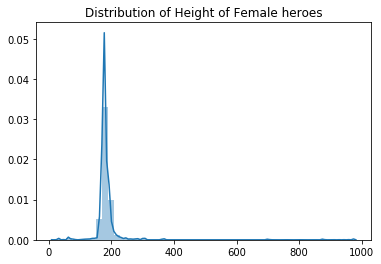

count    200.00000
mean     174.77250
std       20.08911
min       62.50000
25%      168.00000
50%      175.00000
75%      175.00000
max      366.00000
Name: Height, dtype: float64

In [444]:
# Female Height
show_distplot(heroes_df, "female", "Height")
female_heroes_df['Height'].describe()

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


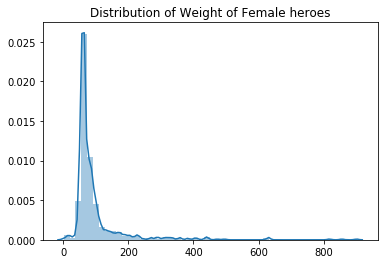

count    200.000000
mean      73.955000
std       65.245597
min       41.000000
25%       55.000000
50%       62.000000
75%       62.000000
max      630.000000
Name: Weight, dtype: float64

In [445]:
# Female Weight
show_distplot(heroes_df, "female", "Weight")
female_heroes_df['Weight'].describe()

In [446]:
print(male_heroes_df['Weight'].describe())
print("--------------------------")
print(female_heroes_df['Weight'].describe())

count    505.000000
mean     104.675248
std       95.550730
min        2.000000
25%       62.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64
--------------------------
count    200.000000
mean      73.955000
std       65.245597
min       41.000000
25%       55.000000
50%       62.000000
75%       62.000000
max      630.000000
Name: Weight, dtype: float64


Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

Height:

male mean height(187) > female mean height(174)

male median height(180) > female median height(175)

male mode height(175) == female mode height(175)

Both male and female height are distributed normally



Weight:

male mean weight(104) > female mean weight(73)

male median weight(79) > female median weight(62)

male mode weight(62) == female mode weight(62)

Both male and female weight are skewed right


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

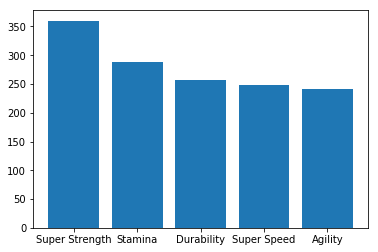

In [447]:
powers = list(powers_df.columns)
counts = []
for power in powers:
    counts.append((power, len(powers_df[powers_df[power] == True])))
counts.sort(key = lambda x: x[1], reverse = True)
ordered_powers = []
ordered_counts = []
for count in counts:
    ordered_powers.append(count[0])
    ordered_counts.append(count[1])

plt.bar(ordered_powers[0:5], ordered_counts[0:5])
plt.show()

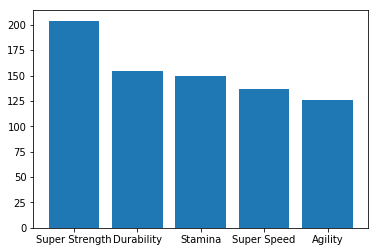

In [448]:
joined_df = powers_df.join(heroes_df, how = "left")
joined_df['Publisher'] = joined_df['Publisher'].map(lambda x: "Missing" if type(x) != str else x)
marvel_df = joined_df[joined_df['Publisher'] == "Marvel Comics"]
marvel_df.head()

powers = list(powers_df.columns)
counts = []
for power in powers:
    counts.append((power, len(marvel_df[marvel_df[power] == True])))
counts.sort(key = lambda x: x[1], reverse = True)
counts[0:5]

ordered_powers = []
ordered_counts = []
for count in counts:
    ordered_powers.append(count[0])
    ordered_counts.append(count[1])

plt.bar(ordered_powers[0:5], ordered_counts[0:5])
plt.show()

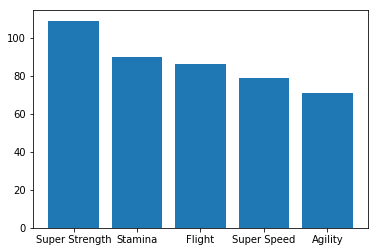

In [449]:
dc_df = joined_df[joined_df['Publisher'] == "DC Comics"]

powers = list(powers_df.columns)
counts = []
for power in powers:
    counts.append((power, len(dc_df[dc_df[power] == True])))
counts.sort(key = lambda x: x[1], reverse = True)
counts[0:5]

ordered_powers = []
ordered_counts = []
for count in counts:
    ordered_powers.append(count[0])
    ordered_counts.append(count[1])

plt.bar(ordered_powers[0:5], ordered_counts[0:5])
plt.show()

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

All very similar, DC has flight in top 5 whereas Marvel and overall have durability. SUper strength is top in both.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

I took "Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?" to be a matter of finding the highest correlations amongst two different powers. I found overall and male to be the same, but female different.

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [612]:
correlated_powers = powers_df.corr()

correlated_powers

for power in list(correlated_powers.columns):
    correlated_powers[power] = correlated_powers[power].map(lambda x: 0 if x == 1 else x)

maximum = 0
for power in list(correlated_powers.columns):
    maximum_per_power = max(list(correlated_powers[power]))
    if maximum_per_power > maximum:
        maximum = maximum_per_power

power_name = ""
for power in list(correlated_powers.columns):
    maximum_per_power = max(list(correlated_powers[power]))
    if maximum_per_power == maximum:
        power_name = power

power_name #'Melting'
    
correlated_powers[power_name].sort_values(ascending = False).head() #Intuitive aptitude

Intuitive aptitude    0.706576
Enhanced Memory       0.277908
Radiation Control     0.263431
Enhanced Touch        0.263431
Fire Resistance       0.160083
Name: Melting, dtype: float64

In [613]:
for power in powers:
    powers_binary[power] = powers_df[power].map(lambda x: 1 if x == True else 0)

joined_df = heroes_df.join(powers_binary, how = "right")
joined_df['Gender'] = joined_df['Gender'].map(lambda x: "Missing" if type(x) != str else x)

male_power_df = joined_df[joined_df["Gender"] == 'Male']
heroes_columns = list(heroes_df.columns)
heroes_columns
male_power_df.drop(columns = heroes_columns)

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abe Sapien,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abin Sur,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abomination,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abraxas,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Absorbing Man,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Monroe,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Strange,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Agent Bob,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agent Zero,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [614]:
correlated_powers_male = male_power_df.drop(columns = heroes_columns).corr()

correlated_powers_male

for power in list(correlated_powers_male.columns):
    correlated_powers_male[power] = correlated_powers_male[power].map(lambda x: 0 if x == 1 else x)

maximum = 0
for power in list(correlated_powers_male.columns):
    maximum_per_power = max(list(correlated_powers_male[power]))
    if maximum_per_power > maximum:
        maximum = maximum_per_power

power_name = ""
for power in list(correlated_powers_male.columns):
    maximum_per_power = max(list(correlated_powers_male[power]))
    if maximum_per_power == maximum:
        power_name = power

power_name #'Melting'
    
correlated_powers_male[power_name].sort_values(ascending = False).head() #Intuitive aptitude

Intuitive aptitude    0.706343
Enhanced Touch        0.349720
Enhanced Memory       0.310006
Radiation Control     0.283657
Fire Resistance       0.188182
Name: Melting, dtype: float64

In [615]:
female_power_df = joined_df[joined_df["Gender"] == 'Female']
female_power_df.drop(columns = heroes_columns)


correlated_powers_female = female_power_df.drop(columns = heroes_columns).corr()

correlated_powers_female

for power in list(correlated_powers_female.columns):
    correlated_powers_female[power] = correlated_powers_female[power].map(lambda x: 0 if x == 1 else x)

maximum = 0
for power in list(correlated_powers_female.columns):
    maximum_per_power = max(list(correlated_powers_female[power]))
    if maximum_per_power > maximum:
        maximum = maximum_per_power

power_name = ""
for power in list(correlated_powers_female.columns):
    maximum_per_power = max(list(correlated_powers_female[power]))
    if maximum_per_power == maximum:
        power_name = power

power_name #'Vision-Thermal'
    
correlated_powers_female[power_name].sort_values(ascending = False).head() #Vision-Infrared

Vision - Infrared       0.827519
Vision - X-Ray          0.655039
Vision - Microscopic    0.655039
Vision - Telescopic     0.630353
Vision - Night          0.630353
Name: Vision - Thermal, dtype: float64

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data